In [2]:
import pandas as pd

In [3]:
import numpy as np

In [21]:
df=pd.read_csv('placement.csv')

In [22]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


In [23]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [24]:
df

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0
...,...,...,...,...
95,95,4.3,200.0,0
96,96,4.4,42.0,0
97,97,6.7,182.0,1
98,98,6.3,103.0,1


# Steps

# 0. Preprocess + EDA + Feature Selection
# 1. Extract input and output cols
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model/model selection
# 6. Deploy the model.

In [25]:
df=df.iloc[:,1:]
df 
#the first : takes all the columns, after comma the 1: means all the columns after 1.so effectively its skips the first column.
#run only once

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0
...,...,...,...
95,4.3,200.0,0
96,4.4,42.0,0
97,6.7,182.0,1
98,6.3,103.0,1


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


Now that data preprocessing is over. Lets go to EDA. We mainly use matplotlib

In [29]:
import matplotlib.pyplot as plt

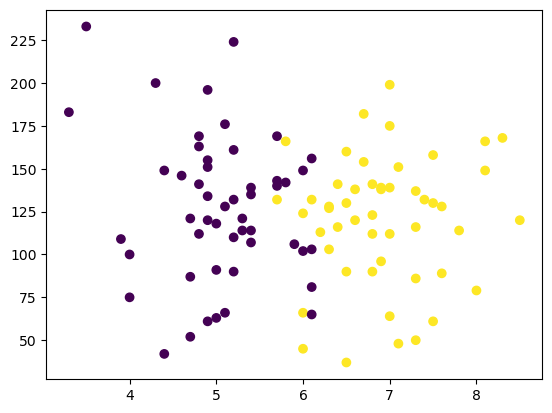

In [33]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
#what happened here is that we have a graph having cgpa as x axis and iq as y axis and since the values in placement is 0 or 1 we have used c= to colour those students whose placement has been achieved.

#here there aint much to do in feature selection in this case so we are skipping it.

#now we are gonna decide the input and output column.
#the input columns are the independent column and the output column is the dependent column.

In [36]:
x=df.iloc[:,0:2]
y= df.iloc[:,-1]
#so x is the indepent variables i.e the cgpa and the iq column.
#y is the dependent variable i.e the last column.

In [37]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [38]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [39]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler=StandardScaler()

In [42]:
x=scaler.fit_transform(x)

In [43]:
x

array([[ 0.71095807, -0.01459341],
       [-0.0799718 , -0.44233119],
       [-0.60725838, -0.0649155 ],
       [ 1.23824465,  0.21185601],
       [-0.16785289,  0.46346647],
       [ 0.97460136, -1.90167186],
       [-0.25573399,  0.48862751],
       [-0.87090167, -1.52425617],
       [ 0.0957904 ,  0.81572111],
       [-0.78302057, -1.44877303],
       [ 0.0079093 , -1.977155  ],
       [ 0.79883917,  0.36282228],
       [-0.51937728,  0.38798333],
       [ 0.35943369, -0.19072073],
       [ 0.0957904 , -0.51781433],
       [-0.78302057,  1.31894203],
       [-0.69513948,  2.52667224],
       [-2.36488031,  1.49506935],
       [-1.74971264, -0.59329747],
       [-0.69513948,  0.21185601],
       [ 0.53519588, -0.09007654],
       [ 0.97460136,  0.68991588],
       [-0.95878277, -0.09007654],
       [-1.13454496, -0.92039106],
       [-1.13454496, -0.0649155 ],
       [-0.87090167, -0.81974688],
       [ 0.88672027,  1.89764609],
       [ 0.0079093 ,  0.01056764],
       [-0.69513948,

remember that scaling is for independent features not the dependent ones. we are using fit_transform. 
fit_transform combines the fit() and transform() into 1.

now the train test split

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)
#this fuction has the following parameters:input collumn,output collumn,the split ratio as test_size=
#the ratio 0.1 implies that 10% of data will be taken as testing data and 90% will be training data.
#the data is split in the same order as above.

In [47]:
x_train


array([[-0.87090167, -0.14039864],
       [ 1.85341233,  1.06733157],
       [-0.78302057,  1.31894203],
       [-0.87090167, -1.52425617],
       [ 0.0079093 , -1.44877303],
       [-0.95878277,  0.79056007],
       [-0.25573399,  0.41314438],
       [-1.39818825, -2.05263813],
       [ 0.0957904 ,  0.21185601],
       [ 0.0079093 ,  0.63959379],
       [-1.04666386,  0.43830542],
       [ 0.53519588, -0.09007654],
       [ 0.27155259,  0.08605078],
       [-1.74971264, -0.59329747],
       [-1.04666386, -0.29136491],
       [-0.69513948,  2.52667224],
       [ 0.53519588,  0.36282228],
       [-0.69513948, -0.84490793],
       [ 0.0079093 , -0.54297537],
       [-0.78302057,  0.11121182],
       [-0.60725838, -0.24104282],
       [-1.39818825,  0.63959379],
       [-1.04666386,  1.14281471],
       [ 1.85341233,  0.63959379],
       [-1.74971264, -1.22232362],
       [ 0.44731478, -0.84490793],
       [ 0.88672027, -0.29136491],
       [ 1.76553123, -1.12167943],
       [-0.87090167,

In [50]:
x_train.size

180

In [51]:
x_test.size

20

In [52]:
x_train.shape

(90, 2)

In [54]:
x_test.shape

(10, 2)

In [55]:
y_train.size

90

In [56]:
y_test.size

10

**now that the train test split is done we will train the model.the model used here is logistic regression.** 

In [57]:
from sklearn.linear_model import LogisticRegression

In [58]:
clf=LogisticRegression()

In [60]:
#model training. fit() is needed to train the model.The syntax is fit(training_input,taining_output) 
clf.fit(x_train,y_train)

LogisticRegression()

**now that the training is done we will test the dataset.**

In [62]:
y_pred=clf.predict(x_test)
#here the model will predict and give output according to the input in an array format

**now that the testing is done we will need accuracy figures**

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
accuracy_score(y_test,y_pred)

0.9

**so the accuracy is 90% when you compare y_pred with y_test**

**now to plot the decision boundary**

<Axes: >

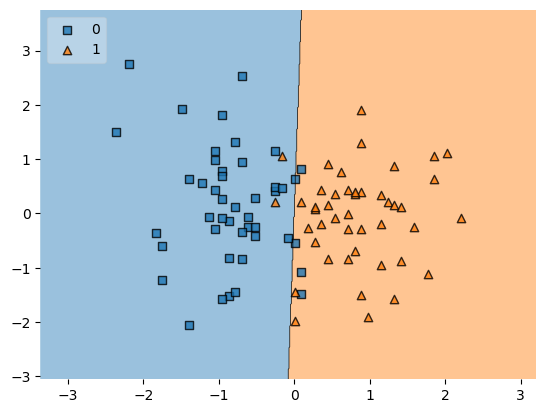

In [70]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(x_train,y_train.values,clf=clf,legend=2)
#y must be a NumPy array so y_train.values

In [ ]:
import pickle
pickle.dump(clf,open('model.pkl','wb'))
#pickle is used to export the model into a seperate file which contains the model so it can be deployed in the web and such.the model.pkl is filename
#the wb means write binary.
#the clf is the model we are exporting.

In [71]:
import os
os.path.abspath("")

'C:\\Users\\Ashwin\\campusx\\learning_projects\\EndToEndToyProject'